<a href="https://colab.research.google.com/github/kebabee/Machine-Learning/blob/main/nonstd_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap


# 1. Implementing the perceptron agorithm

In [25]:
class Perceptron:
    def __init__(self, learning_rate, n_iters):
        self.eta = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.errors_ = []
        self.history = []
        self.historybias = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            errors = 0
            for idx, x_i in enumerate(X):
                update = self.eta * (y_[idx] - self.predict(x_i))
                self.weights += update * x_i
                self.bias += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.history.append(self.weights.copy())
            self.historybias.append(self.bias)


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output > 0, 1, 0)

    def decision_boundary(self, X):
        return -(self.weights[0] * X + self.bias) / self.weights[1]


def plot_decision_regions(X, Y, classifier, test_idx=None,resolution=0.02):
    # configuration of labels and colors
    markers = ('s','^','o','x','v')
    colors  = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y))])
    #print(cmap(0))
    # plots decision lines
    x1_min, x1_max, = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max, = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))

    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    #now we plot the data
    for idx, cl in enumerate(np.unique(Y)):
        #print(cl,Y,Y==cl)
        #print(X[Y==cl,0])
        #plt.scatter(x=X[Y==cl,0], y=X[Y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx],label=cl)
        plt.scatter(x=X[Y==cl,0], y=X[Y==cl,1], alpha=0.8, marker=markers[idx],label=cl)



def plot_decision_regions2(ax,X, Y, classifier, test_idx=None,resolution=0.02):
    # configuration of labels and colors
    markers = ('s','^','o','x','v')
    colors  = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y))])
    #print(cmap(0))
    # plots decision lines
    x1_min, x1_max, = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max, = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1,xx2, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim((xx1.min(),xx1.max()))
    ax.set_ylim((xx2.min(),xx2.max()))

    #now we plot the data
    for idx, cl in enumerate(np.unique(Y)):
        #print(cl,Y,Y==cl)
        #print(X[Y==cl,0])
        #plt.scatter(x=X[Y==cl,0], y=X[Y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx],label=cl)
        ax.scatter(x=X[Y==cl,0], y=X[Y==cl,1], alpha=0.8, marker=markers[idx],label=cl)

# 1.1 Using the sklearn package for generation data obtain two classes of data that are linearly separable.

In [26]:
X, Y = make_blobs(n_samples=100, n_features=2, centers=[[1, 5], [-4, 0]], cluster_std=0.8, random_state=100)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8,test_size=0.2, shuffle=True)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

X_test_scale

array([[-0.49699087, -1.1862167 ],
       [-0.74024513, -0.72183967],
       [ 0.38482906,  1.45958992],
       [-0.38538944, -1.06749254],
       [-1.42927188, -1.30374003],
       [-0.91380388, -1.19570058],
       [ 0.6945197 ,  1.25468256],
       [-1.14631313, -0.75647425],
       [ 0.57433524,  1.1107358 ],
       [ 0.35705462,  1.1143886 ],
       [-0.6194744 , -0.66148858],
       [-1.90323129, -0.94946976],
       [-0.96941084, -0.9529493 ],
       [ 0.7719006 ,  1.01614842],
       [-1.37522693, -1.00919407],
       [-1.39902168, -0.93009606],
       [ 0.90272491,  1.15783706],
       [-1.08100369, -1.40774854],
       [ 0.3163924 ,  1.1134263 ],
       [ 0.90272747,  1.00756426]])

In [27]:
Y_test

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

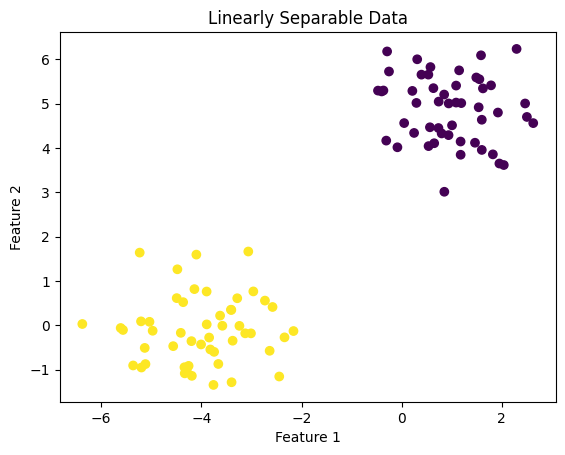

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linearly Separable Data")
plt.show()

In [29]:
ppn = Perceptron(learning_rate=0.01, n_iters=15)
ppn.fit(X_train_scale, Y_train)

ppn.history[:15], ppn.historybias[:15]

([array([-0.0122103 , -0.01145235]),
  array([-0.0122103 , -0.01145235]),
  array([-0.0122103 , -0.01145235]),
  array([-0.0122103 , -0.01145235]),
  array([-0.0122103 , -0.01145235]),
  array([-0.0122103 , -0.01145235]),
  array([-0.0122103 , -0.01145235]),
  array([-0.0122103 , -0.01145235]),
  array([-0.0122103 , -0.01145235]),
  array([-0.0122103 , -0.01145235]),
  array([-0.0122103 , -0.01145235]),
  array([-0.0122103 , -0.01145235]),
  array([-0.0122103 , -0.01145235]),
  array([-0.0122103 , -0.01145235]),
  array([-0.0122103 , -0.01145235])],
 [0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.01])

In [30]:
Y_pred= ppn.predict(X_test_scale)
Y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [31]:
(Y_test !=Y_pred).sum()

0

In [32]:
error = (Y_test !=Y_pred).sum()/len(Y_test)
error

0.0

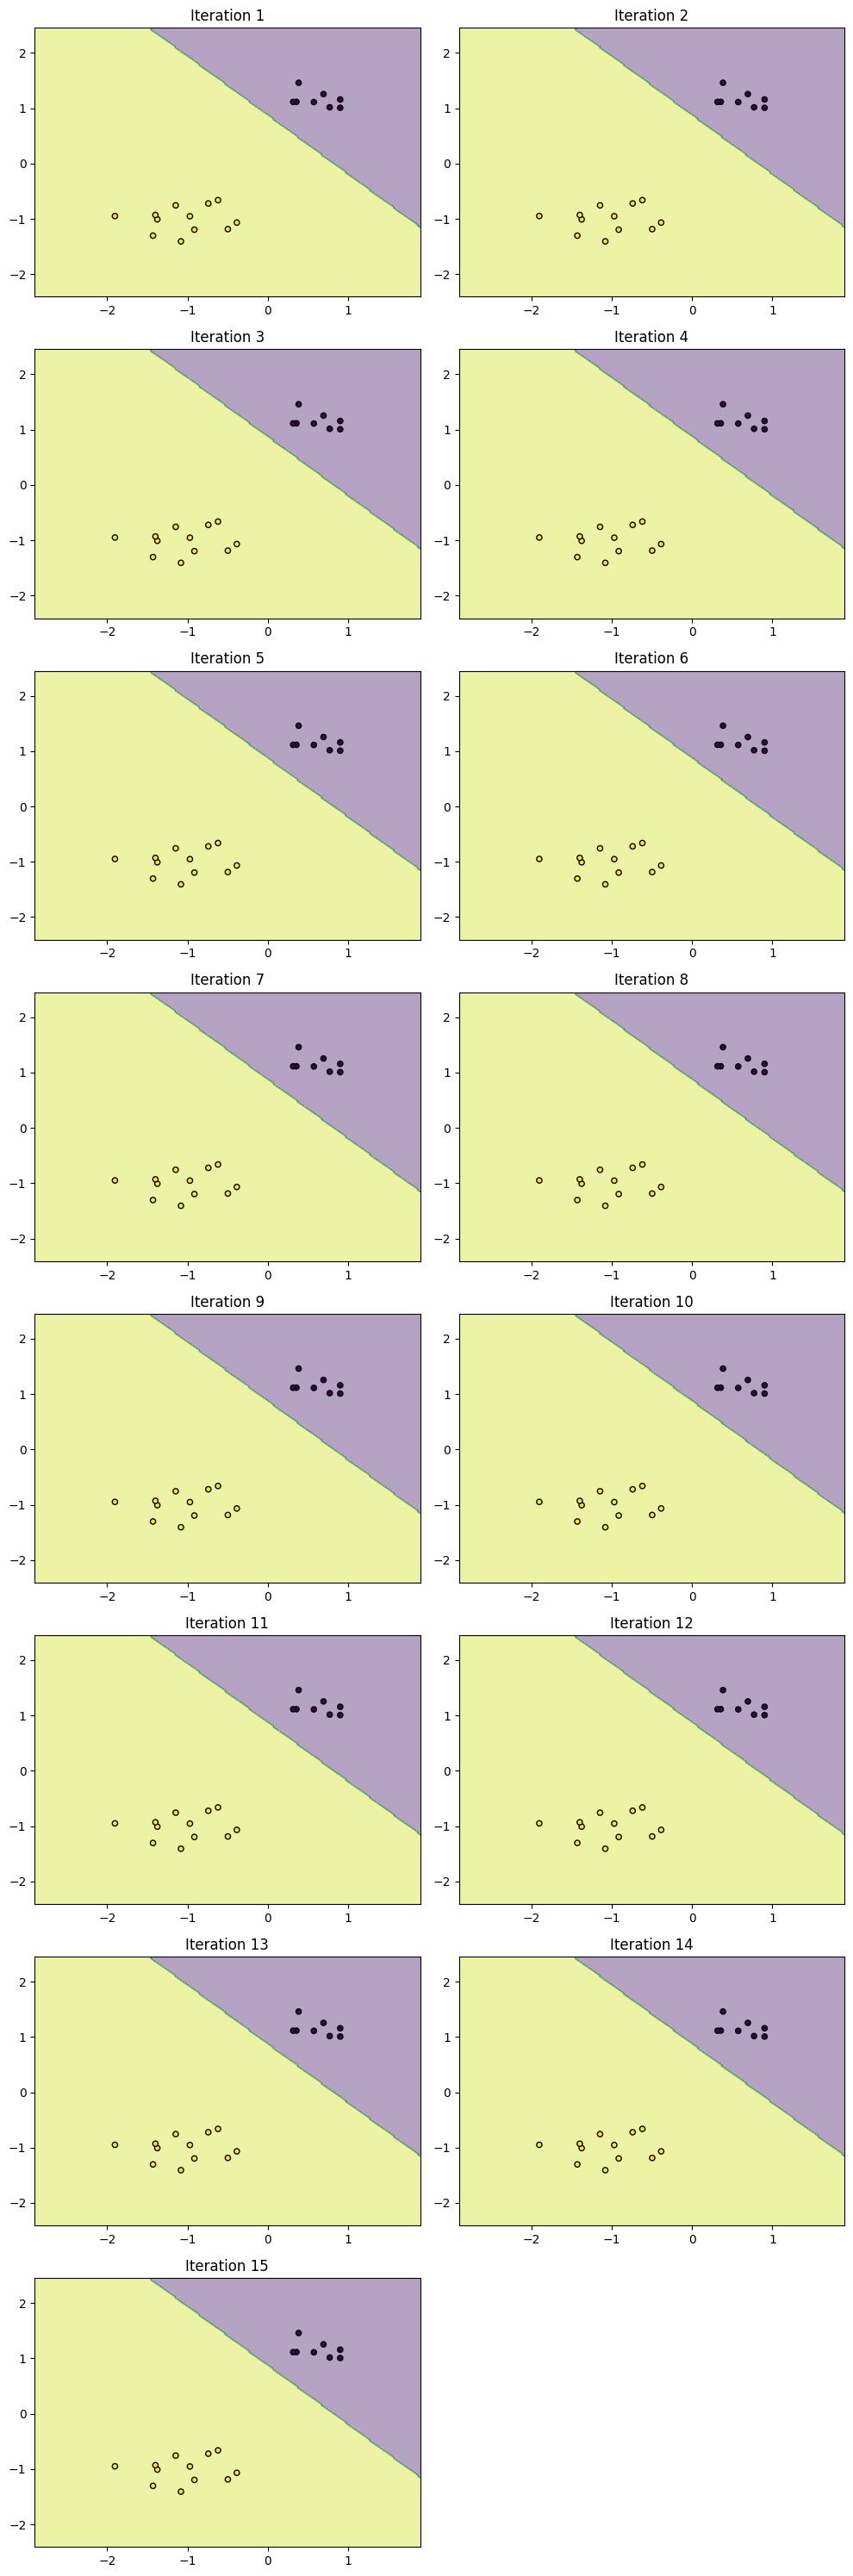

In [33]:
def plot_decision_boundaries(X, Y, classifier, iteration_steps):
    # This is adjustment of plotting method from lecture
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))

    fig, axs = plt.subplots(nrows=(len(iteration_steps) + 1) // 2, ncols=2, figsize=(10, len(iteration_steps) * 2)) #I create two columns of plots
    axs = axs.flatten()

    for idx, step in enumerate(iteration_steps):
        classifier.weights, classifier.bias = classifier.history[step], classifier.historybias[step] #again gets everything from history

        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) #Lecture method - predicting + ravel()
        Z = Z.reshape(xx1.shape)
        axs[idx].contourf(xx1, xx2, Z, alpha=0.4) #Contour plot

        axs[idx].scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k') #scatter points
        axs[idx].set_title(f'Iteration {step + 1}')

    for ax in axs[len(iteration_steps):]:
        ax.axis('off') #hiding unused subplots

    plt.tight_layout()
    plt.show()



plot_decision_boundaries(X_test_scale, Y_test, ppn, iteration_steps=range(ppn.n_iters))

Second dataset (less separable)

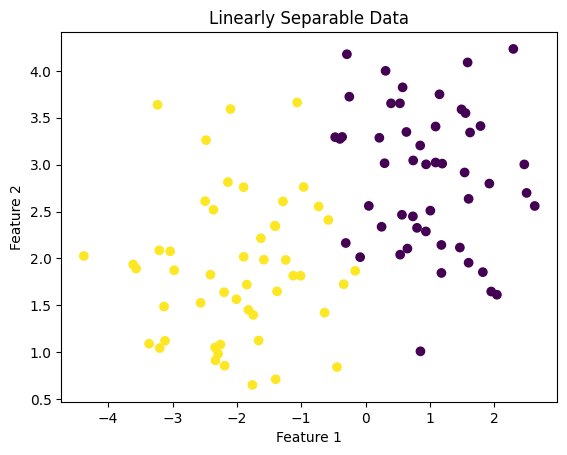

([array([-0.02356917, -0.00935268]),
  array([-0.03672234, -0.00057699]),
  array([-0.04436864, -0.00362924]),
  array([-0.05201493, -0.00668148]),
  array([-0.05530869, -0.01580515]),
  array([-0.05720639, -0.0045285 ]),
  array([-0.06393933, -0.0092082 ]),
  array([-0.06439618, -0.01085786]),
  array([-0.06485302, -0.01250751]),
  array([-0.06530987, -0.01415717]),
  array([-0.06752467, -0.01353675]),
  array([-0.06663846, -0.01688525]),
  array([-0.06853616, -0.00560859]),
  array([-0.07273624, -0.0080477 ]),
  array([-0.07319308, -0.00969736])],
 [0.01,
  0.02,
  0.02,
  0.02,
  0.01,
  0.02,
  0.02,
  0.02,
  0.02,
  0.02,
  0.01,
  0.01,
  0.02,
  0.02,
  0.02])

In [34]:
X2, Y2 = make_blobs(n_samples=100, n_features=2, centers=[[1, 3], [-2, 2]], cluster_std=0.8, random_state=100)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, train_size=0.8,test_size=0.2, shuffle=True)

plt.scatter(X2[:, 0], X2[:, 1], c=Y2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linearly Separable Data")
plt.show()

scaler = StandardScaler()
scaler.fit(X2_train)
X2_train_scale = scaler.transform(X2_train)
X2_test_scale = scaler.transform(X2_test)

ppn = Perceptron(learning_rate=0.01, n_iters=15)
ppn.fit(X2_train_scale, Y2_train)

ppn.history[:15], ppn.historybias[:15]

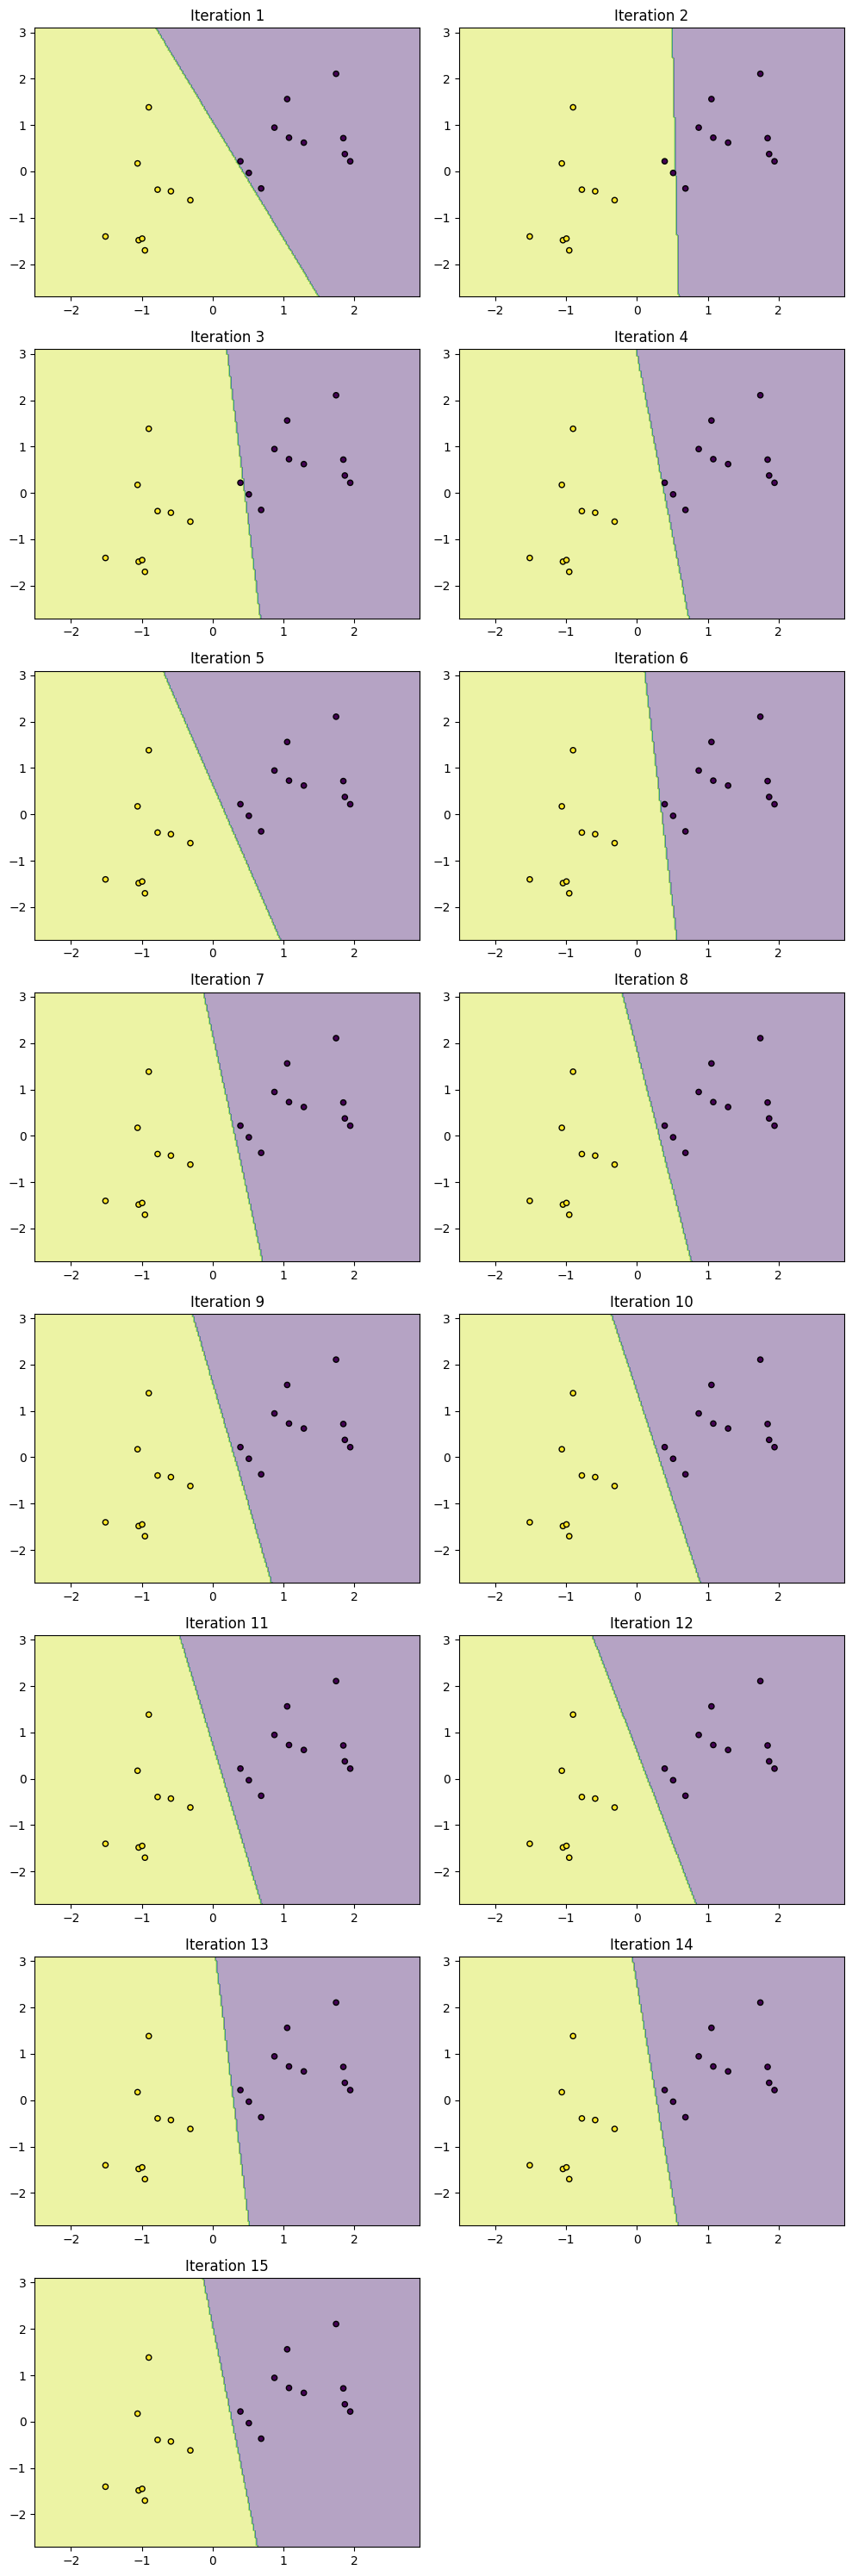

In [35]:
plot_decision_boundaries(X2_test_scale, Y2_test, ppn, iteration_steps=range(ppn.n_iters))

smaller learning rate?

In [36]:
ppn = Perceptron(learning_rate=0.0001, n_iters=250)
ppn.fit(X2_train_scale, Y2_train)

ppn.history[:250], ppn.historybias[:250]

([array([-2.35691676e-04, -9.35267888e-05]),
  array([-3.67223417e-04, -5.76993197e-06]),
  array([-4.43686361e-04, -3.62923576e-05]),
  array([-5.20149304e-04, -6.68147833e-05]),
  array([-0.00055309, -0.00015805]),
  array([-5.72063859e-04, -4.52849931e-05]),
  array([-6.39393317e-04, -9.20820450e-05]),
  array([-0.00064396, -0.00010858]),
  array([-0.00064853, -0.00012508]),
  array([-0.0006531 , -0.00014157]),
  array([-0.00067525, -0.00013537]),
  array([-0.00066638, -0.00016885]),
  array([-6.85361554e-04, -5.60859116e-05]),
  array([-7.27362355e-04, -8.04770396e-05]),
  array([-7.31930815e-04, -9.69735836e-05]),
  array([-0.0007365 , -0.00011347]),
  array([-0.00074107, -0.00012997]),
  array([-0.00074564, -0.00014646]),
  array([-0.0007502 , -0.00016296]),
  array([-0.00075477, -0.00017946]),
  array([-0.00075934, -0.00019595]),
  array([-0.00076391, -0.00021245]),
  array([-0.00076848, -0.00022895]),
  array([-8.18465643e-04, -7.64902766e-05]),
  array([-0.00080411, -0.0002351

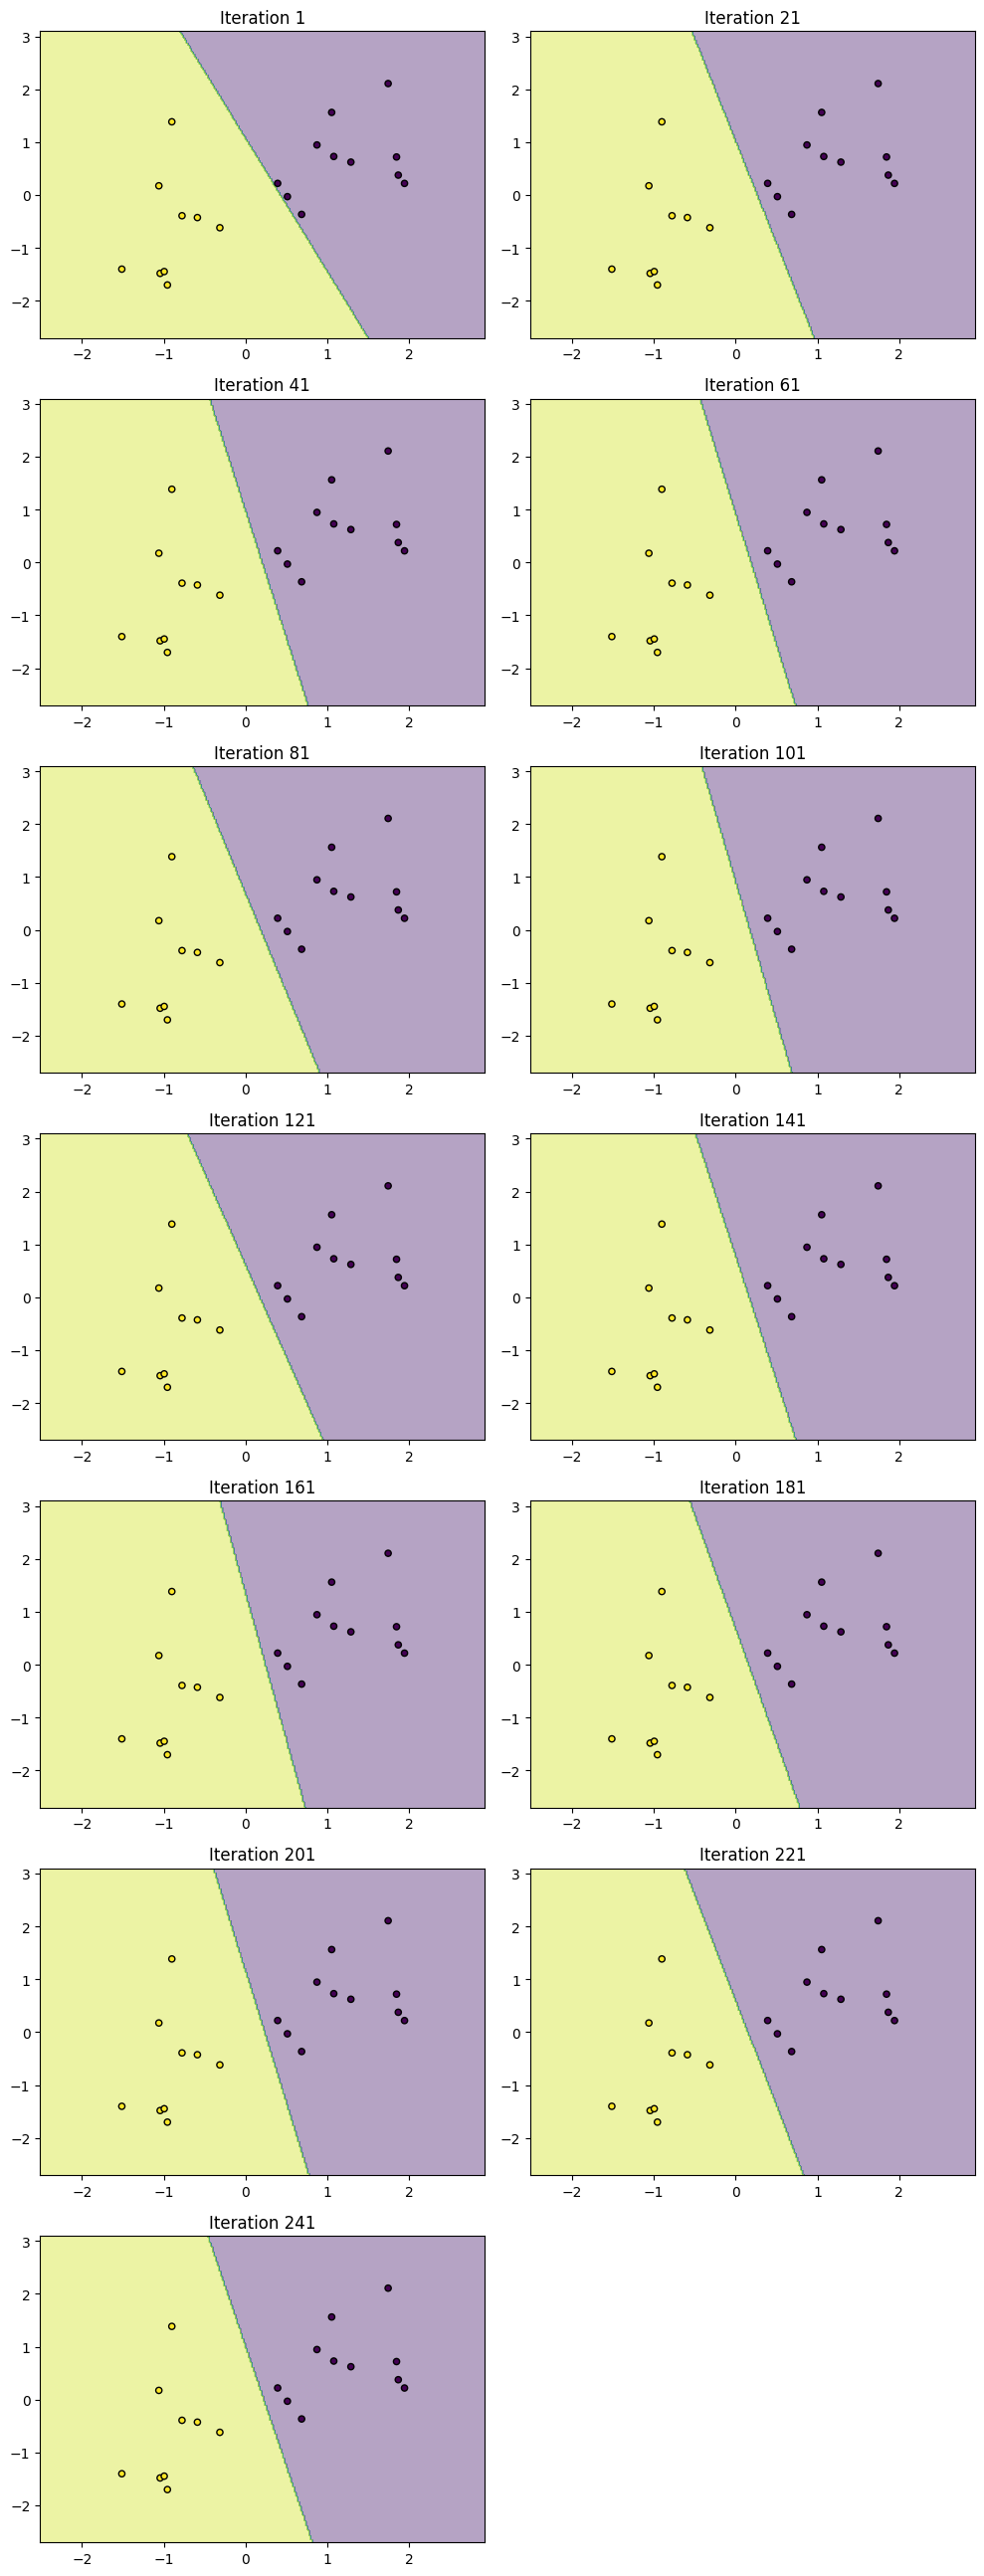

In [37]:
plot_decision_boundaries(X2_test_scale, Y2_test, ppn, iteration_steps=range(0, ppn.n_iters, 20))

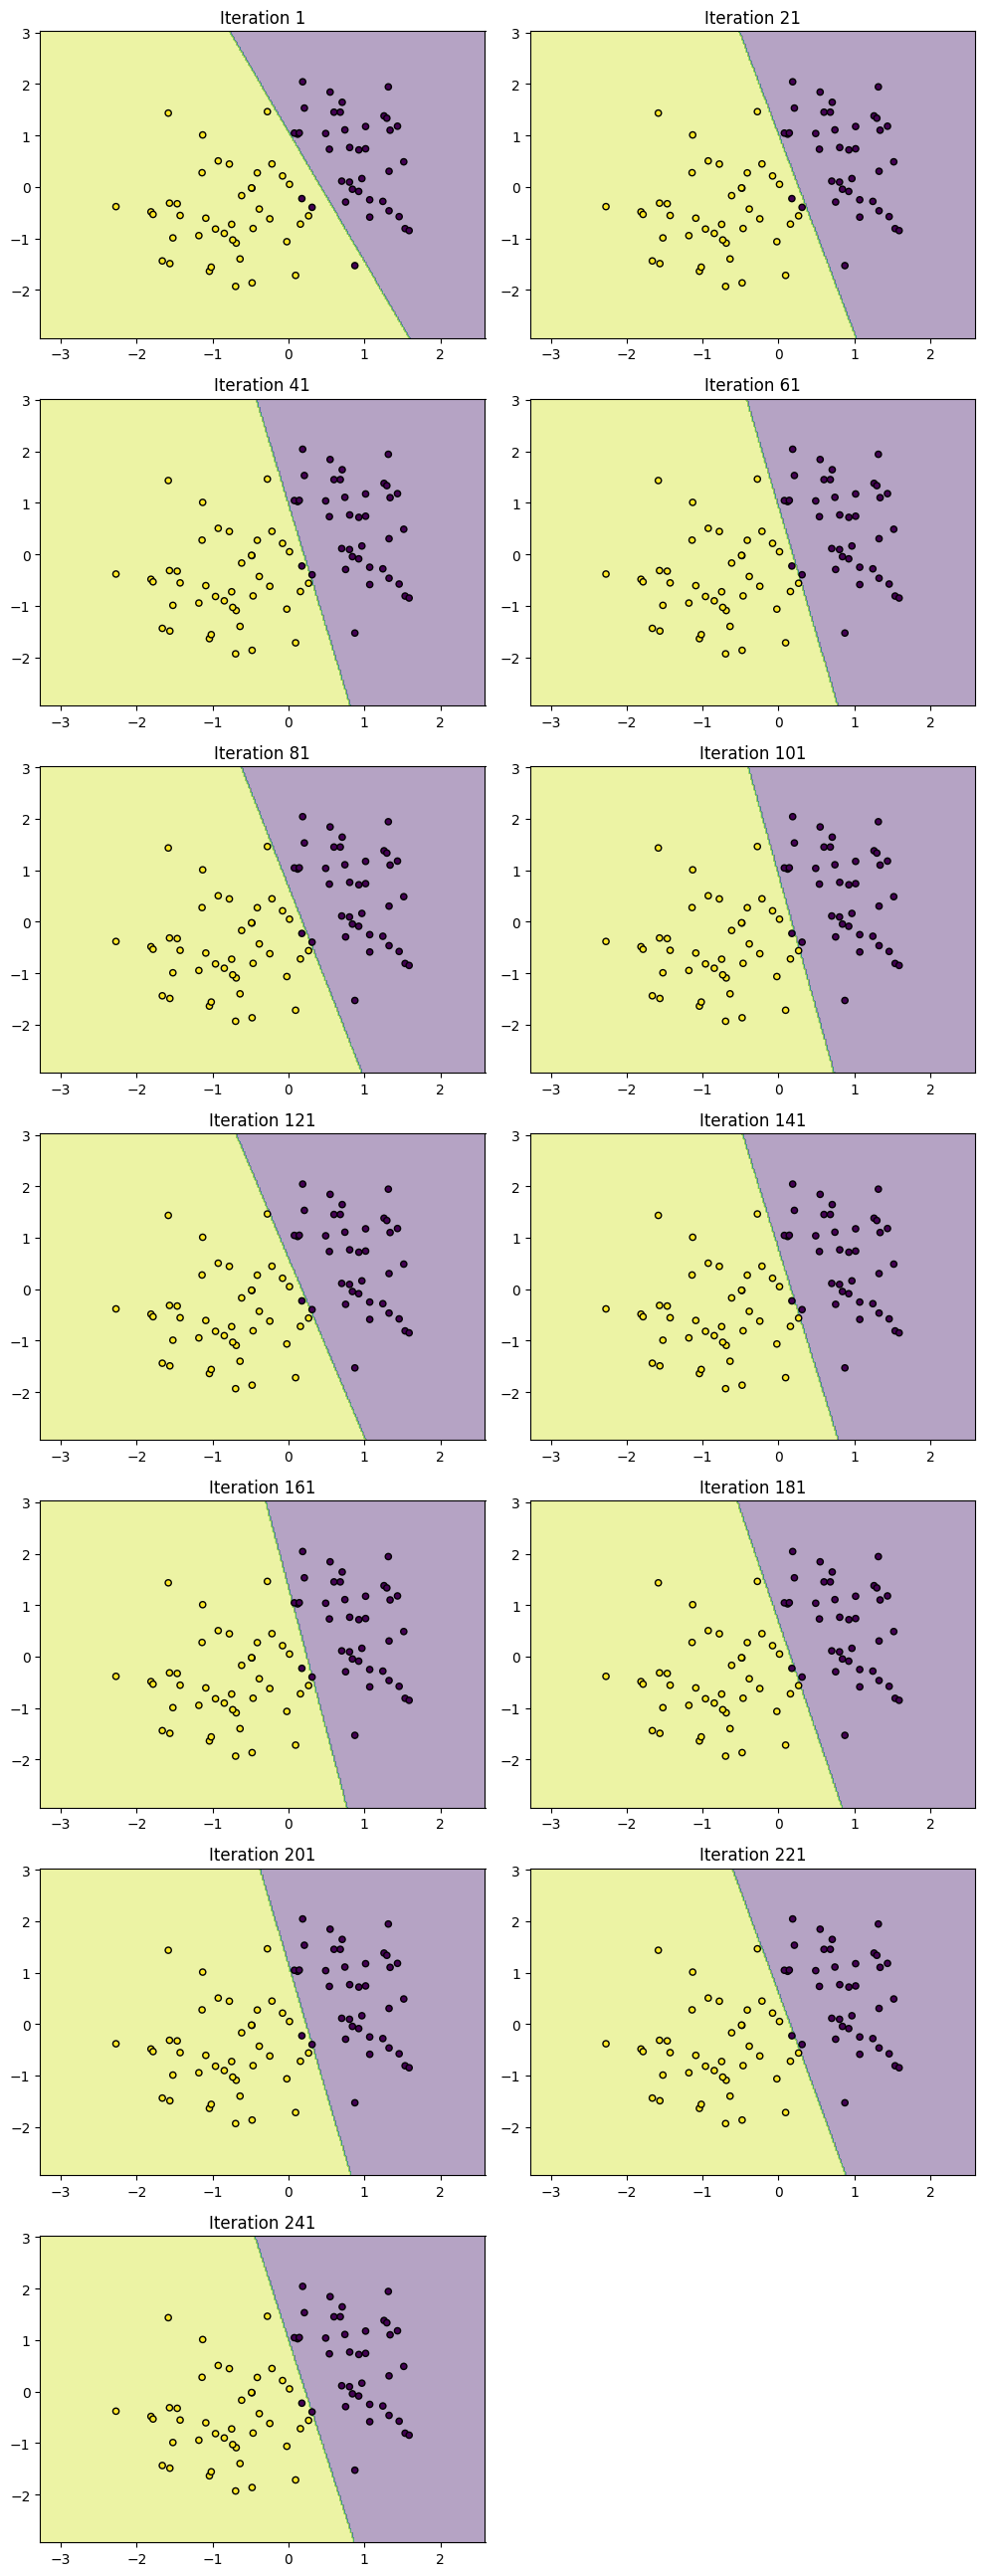

In [38]:
plot_decision_boundaries(X2_train_scale, Y2_train, ppn, iteration_steps=range(0, ppn.n_iters, 20))

My perceptron is working but the nature of second dataset cause not perfect accuracy.